## Access CPI input data series api.bls.gov, as well as build various DataFrames relating to CPI weights information

In [1]:
%matplotlib inline

#  DISPLAY options
from IPython.display import Image 
#  e.g. Image(filename='holt-winters-equations.png', embed=True)
from IPython.display import YouTubeVideo
#  e.g. YouTubeVideo('1j_HxD4iLn8')
from IPython.display import HTML # useful for snippets
#  e.g. HTML('<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>')
import pandas as pd
import sys,os
import yi_fred as yif
import yi_0sys as yi0
import yi_1tools as yit
import importlib
from math import log
import json, requests,lxml
import numpy as np
import datetime
import traceback
import pdb



### Set up URL and registration key for  accessing data from `api.bls.gov`

In [2]:
bls_base_url = 'https://api.bls.gov/publicAPI/v2'
headers = {'Content-type': 'application/json'}
reg_key = open('./temp_folder/bls_reg_key.txt','r').read()

### Get all surveys from BLS and save them in `df_all_surveys.csv`

In [4]:
dict_surveys = json.loads(requests.get(f'{bls_base_url}/surveys').text)
df_all_surveys = pd.DataFrame(dict_surveys['Results']['survey'])
df_all_surveys.to_csv('df_all_surveys.csv',index=False)

In [5]:
df_all_surveys

,survey_abbreviation,survey_name
0,AP,Consumer Price Index - Average Price Data
1,BD,Business Employment Dynamics
2,BG,Collective Bargaining Agreements-State and Loc...
3,BP,Collective Bargaining Agreements-Private Sector
4,CC,Employer Costs for Employee Compensation
...,...,...
61,TU,American Time Use
62,WD,Producer Price Index Commodity-Discontinued Se...
63,WM,Wage Modeling
64,WP,Producer Price Index-Commodities


### Retrieve the AP survey for Average Price Data

In [6]:
dict_surveys = json.loads(requests.get(f'{bls_base_url}/surveys/AP').text)
pd.DataFrame(dict_surveys['Results']['survey'])

,survey_name,survey_abbreviation,allowsNetChange,allowsPercentChange,hasAnnualAverages
0,Consumer Price Index - Average Price Data,AP,true,true,false


### Retreive multiple BLS series data using the v2 public api, with a registration key.

The `data` for the `post` to **api.bls.gov** contains a `seriesid` tag.  The object for this tag is a list of `seriesid` strings, such as `['CUUR0000SA0']` in the example below.

### Show an example of using api.bls.gov to get historical cpi values (seriesID  = CUUR0000SA0)

/Users/bperlman1/Virtualenvs3/dashrisk5/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='yyyymm'>

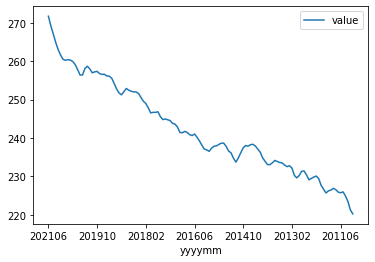

In [7]:
u = f'{bls_base_url}/timeseries/data/'
data = json.dumps({"seriesid": ['CUUR0000SA0'],"startyear":"2011", "endyear":"2021","registrationkey":reg_key})

p = requests.post(u, data=data, headers=headers)
json_data = json.loads(p.text)
df_temp = pd.DataFrame(json_data['Results']['series'][0]['data'])
df_temp['yyyymm'] = df_temp.year.astype(str) + df_temp.period.str.slice(1,3)
df_temp.sort_values('yyyymm')
df_temp['value'] = df_temp['value'].astype(float)
df_temp.plot(x='yyyymm',y='value')

#### Get all codes for the us cities datasets (AP0000).  There are 160 datasets.

In [8]:
# df_codes_us_cities = pd.DataFrame({'code':codes_us_cities}).to_csv('df_codes_us_cities.csv',index=False)

In [9]:
codes_us_cities = pd.read_csv('df_codes_us_cities.csv').code.values.tolist()

#### The dictionary `all_batch_dfs`  holds DataFrames if you decide to not fetch all 160 codes in one call

In [10]:
all_batch_dfs = []

In [11]:
len(codes_us_cities)

92

In [12]:
codes_us_cities

['APU0000701111',
 'APU0000701312',
 'APU0000701322',
 'APU0000702111',
 'APU0000702212',
 'APU0000702421',
 'APU0000703111',
 'APU0000703112',
 'APU0000703113',
 'APU0000703213',
 'APU0000703311',
 'APU0000703432',
 'APU0000703511',
 'APU0000703613',
 'APU0000704111',
 'APU0000704211',
 'APU0000704212',
 'APU0000704312',
 'APU0000705121',
 'APU0000706111',
 'APU0000706212',
 'APU0000706311',
 'APU0000708111',
 'APU0000709112',
 'APU0000710211',
 'APU0000710212',
 'APU0000710411',
 'APU0000711211',
 'APU0000711311',
 'APU0000711411',
 'APU0000711412',
 'APU0000711415',
 'APU0000711417',
 'APU0000712112',
 'APU0000712211',
 'APU0000712311',
 'APU0000712406',
 'APU0000712412',
 'APU0000713111',
 'APU0000714233',
 'APU0000715211',
 'APU0000716116',
 'APU0000717311',
 'APU0000718311',
 'APU0000720111',
 'APU0000720311',
 'APU000072511',
 'APU000072610',
 'APU000072620',
 'APU000074714',
 'APU000074715',
 'APU000074716',
 'APU000074717',
 'APU00007471A',
 'APU0000FC1101',
 'APU0000FC2101',


In [208]:
# # def get_bls_data():
# num_codes = len(codes_us_cities)
# first_code = 0
# bls_base_url = 'https://api.bls.gov/publicAPI/v2'
# df_all = pd.DataFrame
# u = f'{bls_base_url}/timeseries/data/'
# data = json.dumps(
#     {
#         "seriesid": codes_us_cities[first_code:first_code+num_codes],"startyear":"2011", "endyear":"2021",
#         "registrationkey":reg_key,
#     }
# )

# p = requests.post(u, data=data, headers=headers)
# json_data = json.loads(p.text)
# json_data['status']

In [209]:
# json_data['Results']

In [210]:
# df_batch_series = pd.DataFrame()
# for s in json_data['Results']['series']:
#     d = s['data']
#     if len(d)<=0:
#         print(f'no data: {s}')
#         continue
#     df_temp = pd.DataFrame(d)
#     df_temp['yyyymm'] = df_temp.year.astype(str) + df_temp.period.str.slice(1,3)
#     df_temp.sort_values('yyyymm')
#     df_temp['value'] = df_temp['value'].replace(to_replace='-', method='ffill').values
#     df_temp['value'] = df_temp['value'].astype(float)
#     df_temp['sid'] = s['seriesID']
# #     df_temp.plot(x='yyyymm',y='value')
#     df_batch_series = df_batch_series.append(df_temp,ignore_index=True)
# all_batch_dfs.append(df_batch_series)

In [211]:
# df_complete = pd.DataFrame()
# for dft in all_batch_dfs:
#     df_complete = df_complete.append(dft,ignore_index=True)
# df_complete = df_complete.drop('footnotes',axis=1).drop_duplicates(ignore_index=True)

In [367]:
# df_piv = pd.pivot_table(df_complete[['sid','yyyymm','value']],index='yyyymm',columns='sid',values='value')
# df_piv.index.name=None
# df_piv.columns.name = None
# df_piv.index = [datetime.datetime(int(yyyymm[0:4]),int(yyyymm[4:6]),1) for yyyymm in df_piv.index]
# len(df_piv.columns)


50

In [370]:
# df_piv.to_csv('../Inflation_Project/data/raw/df_cpi_broad_cat.csv')

#### Code (commented out) that created `df_dict_bls_codes_used.csv`

In [232]:
# dict_bls_codes = json.load(open('./bls_codes.json'))
# df_dict_bls_codes = pd.DataFrame(
#     {
#         'code':list(dict_bls_codes.keys()),
#         'description':list(dict_bls_codes.values())
#     }
# )
# df_dict_bls_codes.to_csv('df_bls_code_descriptions.csv',index=False)
# df_dict_bls_codes = pd.read_csv('df_bls_code_descriptions.csv')
# piv_cols = list(df_piv.columns.values)
# df_bls_code_descriptions_used = df_dict_bls_codes[df_dict_bls_codes.code.isin(piv_cols)]
# df_bls_code_descriptions_used.to_csv('df_bls_code_descriptions_used.csv',index=False)

#### Change columns names of df_piv, clean data, and create `df_us_prices` csv file

In [372]:
df_bls_code_descriptions_used = pd.read_csv('df_bls_code_descriptions_used.csv')

dict_bls_code_descriptions = {a[0]:a[1] for a in df_bls_code_descriptions_used.values}
df_us_prices = df_piv.rename(columns=dict_bls_code_descriptions)
good_cols = []

for c in df_us_prices.columns.values:
    good_len = len(df_us_prices[~df_us_prices[c].isna()])
    if good_len>=100:
        good_cols.append(c)
df_us_prices = df_us_prices[good_cols]
df_us_prices = df_us_prices.fillna(method='ffill')
df_us_prices.to_csv('df_us_prices.csv',index=False)

In [373]:
df_us_prices.values.shape

(126, 50)

In [374]:
df_us_prices.tail()

            flour  rice_uc  macaroni  bread_white  bread_whole_wheat  \
2021-02-01  0.440    0.779     1.324        1.537              2.203   
2021-03-01  0.436    0.772     1.341        1.526              2.196   
2021-04-01  0.437    0.785     1.251        1.510              2.209   
2021-05-01  0.439    0.801     1.336        1.511              2.151   
2021-06-01  0.356    0.778     1.073        1.510              2.026   

            cookies_cc  ground_chuck  ground_beef  ground_beef_lean  \
2021-02-01       3.800         4.252        3.987             5.611   
2021-03-01       3.964         4.377        4.042             5.780   
2021-04-01       3.939         4.290        4.096             5.973   
2021-05-01       4.019         4.495        4.101             5.952   
2021-06-01       4.068         4.565        4.357             6.016   

            chuck_roast_bl  ...  APU0000715211  APU0000716116  APU0000717311  \
2021-02-01           5.991  ...          0.680          1.72

In [297]:
cu_text = open('cu_data.txt','r').readlines()

In [301]:
cu_arr = [s.strip().split() for s in cu_text]

In [326]:
cu_cols = cu_arr[0][:4]
cu_data = [v[:4] for v in cu_arr[1:]]
# dict_cu = {cu_cols[i]:np.array(cu_data)[:,i] for i in range(4)}
df_cu_data = pd.DataFrame(cu_data,columns=cu_cols)

In [332]:
df_cu_data.columns

Index(['series_id', 'year', 'period', 'value'], dtype='object')

In [335]:
df_cu_data.year = df_cu_data.year.astype(int)
df_cu_data.value = df_cu_data.value.astype(float)

In [336]:
df_cu_data[df_cu_data.year>2000]


              series_id  year period    value
48          CUSR0000SA0  2001    M01  175.600
49          CUSR0000SA0  2001    M02  176.000
50          CUSR0000SA0  2001    M03  176.100
51          CUSR0000SA0  2001    M04  176.400
52          CUSR0000SA0  2001    M05  177.300
...                 ...   ...    ...      ...
910253  CUUSS49GSS47016  2019    S03  250.967
910254  CUUSS49GSS47016  2020    S01  211.248
910255  CUUSS49GSS47016  2020    S02  210.120
910256  CUUSS49GSS47016  2020    S03  210.684
910257  CUUSS49GSS47016  2021    S01  253.195

[784349 rows x 4 columns]

In [345]:
df_cu_data.series_id.str.slice(0,4).unique()

array(['CUSR', 'CUUR', 'CUUS'], dtype=object)

### Methods to retrieve data for seriesid's from api.bls.gov

In [9]:
def get_bls_data(
    bls_codes,
    start_year=2011,
    end_year=None,
    batch_size=500,
    registration_key=reg_key
):
    ey = datetime.datetime.now().year if end_year is None else end_year
    num_codes = len(bls_codes)
    num_batches = num_codes // batch_size + (1 if num_codes % batch_size > 0 else 0)
    bls_base_url = 'https://api.bls.gov/publicAPI/v2'
    u = f'{bls_base_url}/timeseries/data/'
    df_all = pd.DataFrame
    
#     pdb.set_trace()
    for b in range(num_batches):
        first_code = b*batch_size
        num_codes = batch_size if ((first_code + batch_size) < num_codes) else num_codes - first_code
        code_list = bls_codes[first_code:first_code+num_codes]
        data = json.dumps(
            {
                "seriesid": code_list,"startyear": str(start_year), "endyear":str(ey),
                "registrationkey":registration_key,
            }
        )
        try:
            p = requests.post(u, data=data, headers=headers)
            json_data = json.loads(p.text)
            print(json_data['status'])
        except Exception as e:
            traceback.print_exc()
            continue
        df_batch_series = pd.DataFrame()
        # populate df_batch_series
        for s in json_data['Results']['series']:
            d = s['data']
            if len(d)<=0:
                print(f'no data: {s}')
                continue
            df_temp = pd.DataFrame(d)
            df_temp['yyyymm'] = df_temp.year.astype(str) + df_temp.period.str.slice(1,3)
            df_temp.sort_values('yyyymm')
            df_temp['value'] = df_temp['value'].replace(to_replace='-', method='ffill').values
            df_temp['value'] = df_temp['value'].astype(float)
            df_temp['sid'] = s['seriesID']
            df_batch_series = df_batch_series.append(df_temp,ignore_index=True)
        # append df_batch_series to the dictionary all_batch_dfs
        all_batch_dfs.append(df_batch_series)

    # populate df_complete    
    df_complete = pd.DataFrame()
    for dft in all_batch_dfs:
        df_complete = df_complete.append(dft,ignore_index=True)
    df_complete = df_complete.drop('footnotes',axis=1).drop_duplicates(ignore_index=True)    
    return df_complete


def create_bls_pivot(df_complete):
    '''
    make the data for each series id into a column
    '''
    df_piv = pd.pivot_table(df_complete[['sid','yyyymm','value']],index='yyyymm',columns='sid',values='value')
    df_piv.index.name=None
    df_piv.columns.name = None
    df_piv.index = [datetime.datetime(int(yyyymm[0:4]),int(yyyymm[4:6]),1) for yyyymm in df_piv.index]
    return df_piv
    

In [12]:
bls_codes_to_fetch = [s.strip() for s in open('./bls_codes.txt','r').readlines()]
len(bls_codes_to_fetch),bls_codes_to_fetch

(1508,
 ['APU0000701111',
  'APU0000701311',
  'APU0000701312',
  'APU0000701321',
  'APU0000701322',
  'APU0000702111',
  'APU0000702112',
  'APU0000702211',
  'APU0000702212',
  'APU0000702213',
  'APU0000702221',
  'APU0000702411',
  'APU0000702421',
  'APU0000702611',
  'APU0000703111',
  'APU0000703112',
  'APU0000703113',
  'APU0000703211',
  'APU0000703212',
  'APU0000703213',
  'APU0000703311',
  'APU0000703312',
  'APU0000703411',
  'APU0000703421',
  'APU0000703422',
  'APU0000703423',
  'APU0000703425',
  'APU0000703431',
  'APU0000703432',
  'APU0000703511',
  'APU0000703512',
  'APU0000703611',
  'APU0000703612',
  'APU0000703613',
  'APU0000704111',
  'APU0000704211',
  'APU0000704212',
  'APU0000704311',
  'APU0000704312',
  'APU0000704313',
  'APU0000704314',
  'APU0000704321',
  'APU0000704411',
  'APU0000704412',
  'APU0000704413',
  'APU0000704421',
  'APU0000705111',
  'APU0000705121',
  'APU0000705141',
  'APU0000705142',
  'APU0000706111',
  'APU0000706211',
  'AP

In [13]:
df_results = get_bls_data(bls_codes_to_fetch)

REQUEST_SUCCEEDED
no data: {'seriesID': 'APU0000701311', 'data': []}
no data: {'seriesID': 'APU0000701321', 'data': []}
no data: {'seriesID': 'APU0000702211', 'data': []}
no data: {'seriesID': 'APU0000702213', 'data': []}
no data: {'seriesID': 'APU0000702221', 'data': []}
no data: {'seriesID': 'APU0000702411', 'data': []}
no data: {'seriesID': 'APU0000702611', 'data': []}
no data: {'seriesID': 'APU0000703211', 'data': []}
no data: {'seriesID': 'APU0000703411', 'data': []}
no data: {'seriesID': 'APU0000703421', 'data': []}
no data: {'seriesID': 'APU0000703422', 'data': []}
no data: {'seriesID': 'APU0000703423', 'data': []}
no data: {'seriesID': 'APU0000703425', 'data': []}
no data: {'seriesID': 'APU0000703611', 'data': []}
no data: {'seriesID': 'APU0000704313', 'data': []}
no data: {'seriesID': 'APU0000704314', 'data': []}
no data: {'seriesID': 'APU0000704321', 'data': []}
no data: {'seriesID': 'APU0000704411', 'data': []}
no data: {'seriesID': 'APU0000704412', 'data': []}
no data: {'se

NameError: name 'all_batch_dfs' is not defined

In [14]:
len(df_results),len(df_results.sid.unique())

NameError: name 'df_results' is not defined

In [405]:
df_results.sid.unique()

array(['APU0000701111', 'APU0000701312', 'APU0000701322', 'APU0000702111',
       'APU0000702212', 'APU0000702421', 'APU0000703111', 'APU0000703112',
       'APU0000703113', 'APU0000703213', 'APU0000703311', 'APU0000703432',
       'APU0000703511', 'APU0000703613', 'APU0000704111', 'APU0000704211',
       'APU0000704212', 'APU0000704312', 'APU0000705121', 'APU0000706111',
       'APU0000706212', 'APU0000706311', 'APU0000708111', 'APU0000709112',
       'APU0000710211', 'APU0000710212', 'APU0000710411', 'APU0000711211',
       'APU0000711311', 'APU0000711411', 'APU0000711412', 'APU0000711415',
       'APU0000711417', 'APU0000712112', 'APU0000712211', 'APU0000712311',
       'APU0000712406', 'APU0000712412', 'APU0000713111', 'APU0000714233',
       'APU0000715211', 'APU0000716116', 'APU0000717311', 'APU0000718311',
       'APU0000720111', 'APU0000720311', 'APU000072511', 'APU000072610',
       'APU000072620', 'APU000074714', 'APU0000702112', 'APU0000703212',
       'APU0000703312', 'APU0

### Get BLS CU item codes and associated weight levels

In [243]:
def get_cu_items():
    cu_text = open('./cu.item.txt','r').readlines()
    cu_headers = cu_text[0].strip().split('\t')
    cu_items = [s.strip().split('\t') for s in cu_txt[1:]]
    df_cu_items = pd.DataFrame(cu_items,columns=cu_headers)
    df_cu_items.sort_sequence = df_cu_items.sort_sequence.astype(int)
    df_cu_items.display_level = df_cu_items.display_level.astype(int)    
    return df_cu_items

In [246]:
# cu_text = open('./cu.item.txt','r').readlines()
# cu_headers = cu_text[0].strip().split('\t')
# cu_items = [s.strip().split('\t') for s in cu_txt[1:]]
# df_cu_items = pd.DataFrame(cu_items,columns=cu_headers)
# df_cu_items.sort_sequence = df_cu_items.sort_sequence.astype(int)
# df_cu_items.display_level = df_cu_items.display_level.astype(int)
get_cu_items()

,item_code,item_name,display_level,selectable,sort_sequence
0,AA0,All items - old base,0,T,2
1,AA0R,Purchasing power of the consumer dollar - old ...,0,T,399
2,SA0,All items,0,T,1
3,SA0E,Energy,1,T,374
4,SA0L1,All items less food,1,T,358
...,...,...,...,...,...
394,SS68023,Tax return preparation and other accounting fees,4,T,352
395,SSEA011,College textbooks,3,T,314
396,SSFV031A,Food at elementary and secondary schools,3,T,122
397,SSGE013,Infants' equipment,3,T,355


### Get BLS Weights for each main CPI group

#### First show all weights, regardless of level.  
*This is kind of useless, because you need to know which weights are with which levels.*

In [31]:
# weights_url = 'https://www.bls.gov/cpi/tables/relative-importance/2020.htm'
# weights_table_match = 'cpi_relimp1'
# list_df_bls_weights = pd.read_html(weights_url)

In [247]:
# df_bls_weights = list_df_bls_weights[0].copy()
# df_bls_weights

### Now use xpath to find a specific weight level.

* Each weight level is coded with a `<p class="subN">` html tag, where N is a level number from 1 to 6
* To find all level 1 weights from DataFrame in `list_df_bls_weights` above, you perform an xpath search for all `<p>` tags with the `class` attributethat level having the value `sub1`
  * Your xpath would be `//p[contains(@class,'sub1')]`

In [215]:
RETRIEVE_WEIGHTS = False
if RETRIEVE_WEIGHTS:
    weights_url = 'https://www.bls.gov/cpi/tables/relative-importance/2020.htm'
    response = requests.get(weights_url)
    tree = lxml.html.fromstring(response.text)
    open('relative-importance_weights_2020.html','w').write(response.text)


#### Now do xpath search for `sub1` (level 01) rows of `df_bls_weights`

In [284]:
def get_bls_cu_df(level=None,merge_how='inner'):
    html_text = open('relative-importance_weights_2020.html','r').read()
    tree = lxml.html.fromstring(html_text) 
    p_class = f'sub{"" if level is None else level}'
    t = f"//p[contains(@class,'{p_class}')]"
    title_elem = tree.xpath(t)[0]
    sub_arr = tree.xpath(t)
    lev_names = [s.text for s in sub_arr]
    df_bls_weights = pd.read_html(html_text)[0]
    df_bls_weights.columns = df_bls_weights.columns.get_level_values(1)
    if level is None:
        df_bls_weights_lev = df_bls_weights.copy()
    else:
        df_bls_weights_lev = df_bls_weights[df_bls_weights['Item and Group'].isin(lev_names)]
    df_bls_weights_lev.index = range(len(df_bls_weights_lev))
    df_bls_weights_lev = df_bls_weights_lev.rename(
        columns={
            'Item and Group':'item_name',
            'CPI-U':'cpiu',
            'CPI-W':'cpiw',
        }
    )
    df_cu_items = get_cu_items()
    df_cu_items = df_cu_items.merge(df_bls_weights_lev,on='item_name',how=merge_how)
    df_cu_items = df_cu_items.drop_duplicates().sort_values('sort_sequence')
    df_cu_items.index = range(len(df_cu_items))
    df_cu_items['upper_sort_sequence'] = df_cu_items.sort_sequence.shift(-1)-1
    df_cu_items.upper_sort_sequence = df_cu_items.upper_sort_sequence.fillna(1000)
    return df_cu_items


In [286]:
def get_bls_cu_df_with_parent(parent_level):
    df_bls_lev_01 = get_bls_cu_df(parent_level)
    df_bls_lev_02 = get_bls_cu_df(parent_level+1)
    parent_ss_array = [
        df_bls_lev_01[
            (df_bls_lev_01.sort_sequence<s) & ((df_bls_lev_01.upper_sort_sequence>s))
        ].sort_sequence.values
        for s in df_bls_lev_02.sort_sequence.values
    ]
    parent_ss_array = [a[0] if len(a)==1 else None for a in parent_ss_array]
    df_bls_lev_02['parent'] = parent_ss_array
    return df_bls_lev_02    

In [308]:
get_bls_cu_df_with_parent(1)

,item_code,item_name,display_level,selectable,sort_sequence,cpiu,cpiw,upper_sort_sequence,parent
0,SAF1,Food,1,T,4,14.119,15.731,136.0,3.0
1,SAH1,Shelter,1,T,137,33.316,31.506,144.0,136.0
2,SAH2,Fuels and utilities,1,T,145,4.387,4.888,155.0,136.0
3,SAH3,Household furnishings and operations,1,T,156,4.682,4.481,187.0,136.0
4,SAA1,Men's and boys' apparel,1,T,188,0.666,0.770,194.0,187.0
5,SAA2,Women's and girls' apparel,1,T,195,1.075,1.106,201.0,187.0
6,SEAE,Footwear,1,T,202,0.644,0.844,205.0,187.0
7,SEAF,Infants' and toddlers' apparel,1,T,206,0.125,0.150,206.0,187.0
8,SEAG,Jewelry and watches,1,T,207,0.153,0.126,210.0,187.0
9,SAT1,Private transportation,1,T,211,14.055,16.043,241.0,210.0


In [307]:
def get_cu_bls_parent_children(parent_level):   
    df_bls_cu_wp_01 = get_bls_cu_df_with_parent(parent_level)
    df_bls_cu_parent_child_01 = pd.DataFrame(
        df_bls_cu_wp_01[
            ['parent','sort_sequence']
        ].groupby('parent',as_index=False).apply(
            lambda df:pd.Series(
                {
                    int(df.parent.values[0]):df.sort_sequence.values
                }
            )
        )
    )
    df_bls_cu_parent_child_01.columns = ['children']

    df_bls_cu_parent_child_01['parent'] = [
        v[1] for v in df_bls_cu_parent_child_01.index.values
    ]
    df_bls_cu_parent_child_01.index = range(len(df_bls_cu_parent_child_01))
    return df_bls_cu_parent_child_01

In [309]:
get_cu_bls_parent_children(1)

,children,parent
0,[4],3
1,"[137, 145, 156]",136
2,"[188, 195, 202, 206, 207]",187
3,"[211, 242]",210
4,"[251, 256]",250
5,"[270, 279, 286, 289, 296, 302, 308]",269
6,"[312, 320]",311
7,"[336, 339]",335
8,[367],366


In [310]:
get_cu_bls_parent_children(2)

,children,parent
0,"[5, 118, 125]",4
1,"[138, 139, 142]",137
2,"[146, 153]",145
3,"[157, 161, 166, 170, 175, 178, 182]",156
4,[189],188
5,[196],195
6,"[203, 204]",202
7,"[208, 209]",207
8,"[212, 221, 227, 232, 236, 237]",211
9,"[243, 244, 248]",242


In [313]:
df1 = get_cu_bls_parent_children(1)
df2 = get_cu_bls_parent_children(2)
grand_parents_df2 = []
for p in df2.parent.values:
    for r in df1.values:
        if p in r[0]:
            grand_parents_df2.append(r[1])
            break
df2['grand_parent'] = grand_parents_df2
df2

,children,parent,grand_parent
0,"[5, 118, 125]",4,3
1,"[138, 139, 142]",137,136
2,"[146, 153]",145,136
3,"[157, 161, 166, 170, 175, 178, 182]",156,136
4,[189],188,187
5,[196],195,187
6,"[203, 204]",202,187
7,"[208, 209]",207,187
8,"[212, 221, 227, 232, 236, 237]",211,210
9,"[243, 244, 248]",242,210


In [62]:
t = "//p[contains(@class,'sub1')]"
title_elem = tree.xpath(t)[0]

sub1_arr = tree.xpath(t)
lev_01 = [s.text for s in sub1_arr]

In [64]:
lev_01

['Food and beverages',
 'Housing',
 'Apparel',
 'Transportation',
 'Medical care',
 'Recreation',
 'Education and communication',
 'Other goods and services',
 'Commodities',
 'Services',
 'Rent of shelter',
 'Transportation services',
 'Other services',
 'All items less food',
 'All items less shelter',
 'All items less medical care',
 'Commodities less food',
 'Nondurables less food',
 'Nondurables less food and apparel',
 'Nondurables',
 'Apparel less footwear',
 'Services less rent of shelter',
 'Services less medical care services',
 'Energy',
 'All items less energy',
 'Domestically produced farm food',
 'Utilities and public transportation']

In [65]:
df_bls_weights.columns = df_bls_weights.columns.get_level_values(1)
df_bls_weights_lev_01 = df_bls_weights[df_bls_weights['Item and Group'].isin(lev_01)]
df_bls_weights_lev_01.index = range(len(df_bls_weights_lev_01))

#### Only the first 9 of the rows in `df_bls_weights_lev_01` are actual BLS data categories that sum up to 100 percent.  

The rows of `df_bls_weights_lev_01` after row 8 represent *sub-aggregations* that help you observe specfic subsets of BLS inputs, like all commodities, or commodities less energy.

In [66]:
bls_main_categoris_cumsum = {
    df_bls_weights_lev_01.iloc[i]['Item and Group']:df_bls_weights_lev_01.iloc[:i]['CPI-U'].values.sum() 
    for i in range(len(df_bls_weights_lev_01))
    if df_bls_weights_lev_01.iloc[:i]['CPI-U'].values.sum()<101
}
bls_main_categoris_cumsum


{'Food and beverages': 0.0,
 'Housing': 15.157,
 'Apparel': 57.542,
 'Transportation': 60.205,
 'Medical care': 75.365,
 'Recreation': 84.235,
 'Education and communication': 90.032,
 'Other goods and services': 96.842,
 'Commodities': 100.001}

In [67]:
df_bls_weights_lev_01_main = df_bls_weights_lev_01.iloc[:8]
df_bls_weights_lev_01_main

,Item and Group,CPI-U,CPI-W
0,Food and beverages,15.157,16.650
1,Housing,42.385,40.874
2,Apparel,2.663,2.996
3,Transportation,15.160,16.853
4,Medical care,8.870,7.594
5,Recreation,5.797,5.223
6,Education and communication,6.810,6.557
7,Other goods and services,3.159,3.253


In [70]:
df_bls_weights_lev_01_main['CPI-U'].sum(),df_bls_weights_lev_01_main['CPI-W'].sum()

(100.001, 100.0)

In [69]:
df_bls_weights_lev_01_aggs = df_bls_weights_lev_01.iloc[8:]
df_bls_weights_lev_01_aggs

,Item and Group,CPI-U,CPI-W
8,Commodities,37.339,41.175
9,Services,62.661,58.825
10,Rent of shelter,32.950,31.182
11,Transportation services,5.142,5.059
12,Other services,11.773,10.704
13,All items less food,85.881,84.269
14,All items less shelter,66.684,68.494
15,All items less medical care,91.130,92.406
16,Commodities less food,23.220,25.443
17,Nondurables less food,12.278,13.446


In [177]:
c1 = df_cu_items.display_level>=0
c2  = df_cu_items.item_name.isin(df_bls_weights_lev_01_main['Item and Group'].values)
c12 = c1 & c2
df_cu_items_level_0 = df_cu_items[c12].sort_values('sort_sequence').copy()
df_cu_items_level_0

,item_code,item_name,display_level,selectable,sort_sequence
30,SAF,Food and beverages,0,T,3
46,SAH,Housing,0,T,136
14,SAA,Apparel,0,T,187
72,SAT,Transportation,0,T,210
52,SAM,Medical care,0,T,250
61,SAR,Recreation,0,T,269
24,SAE,Education and communication,0,T,311
42,SAG,Other goods and services,0,T,335


In [138]:
len(df_cu_items),len(df_bls_weights)

(399, 325)

In [ ]:
c1 = df_cu_items.sort_sequence>=3
c2 = df_cu_items.sort_sequence<136
c12 = c1 & c2
df_cu_items_food = df_cu_items[c12].copy()
df_cu_items_food = df_cu_items_food.merge(
    df_bls_weights,
    left_on='item_name',
    right_on='Item and Group',
    how='inner'
).drop_duplicates()
df_cu_items_food = df_cu_items_food.sort_values('sort_sequence')
df_cu_items_food.index = range(len(df_cu_items_food))


In [203]:
#apparel
c1 = df_cu_items.sort_sequence>=136
c2 = df_cu_items.sort_sequence<187
c12 = c1 & c2
df_cu_items_app = df_cu_items[c12].copy()
df_cu_items_app = df_cu_items_app.merge(
    df_bls_weights,
    left_on='item_name',
    right_on='Item and Group',
    how='inner'
).drop_duplicates()
df_cu_items_app = df_cu_items_app.sort_values('sort_sequence')
df_cu_items_app.index = range(len(df_cu_items_app))


In [204]:
dipdf(df_cu_items_app)

,item_code,item_name,display_level,selectable,sort_sequence,Item and Group,CPI-U,CPI-W
0,SAH,Housing,0,T,136,Housing,42.385,40.874
1,SAH1,Shelter,1,T,137,Shelter,33.316,31.506
2,SEHA,Rent of primary residence,2,T,138,Rent of primary residence,7.862,10.694
3,SEHB,Lodging away from home,2,T,139,Lodging away from home,0.825,0.500
4,SEHB01,"Housing at school, excluding board",3,T,140,"Housing at school, excluding board",0.118,0.050
5,SEHB02,Other lodging away from home including hotels ...,3,T,141,Other lodging away from home including hotels ...,0.707,0.450
6,SEHC,Owners' equivalent rent of residences,2,T,142,Owners' equivalent rent of residences,24.263,19.988
7,SEHC01,Owners' equivalent rent of primary residence,3,T,143,Owners' equivalent rent of primary residence,23.044,19.403
8,SEHD,Tenants' and household insurance,2,T,144,Tenants' and household insurance,0.366,0.323
9,SAH2,Fuels and utilities,1,T,145,Fuels and utilities,4.387,4.888


In [207]:
df_cu_items_app[df_cu_items_app.display_level==1]

,item_code,item_name,display_level,selectable,sort_sequence,Item and Group,CPI-U,CPI-W
1,SAH1,Shelter,1,T,137,Shelter,33.316,31.506
9,SAH2,Fuels and utilities,1,T,145,Fuels and utilities,4.387,4.888
20,SAH3,Household furnishings and operations,1,T,156,Household furnishings and operations,4.682,4.481


In [196]:
def dipdf(df,mr = None):
    _mr_save = pd.get_option("display.max_rows")
    _mr = (len(df)+1) if mr is None else mr
    pd.set_option("display.max_rows",_mr)
    display(df)
    pd.set_option("display.max_rows",_mr_save)
    

In [ ]:
cur_parent = 13
i=12
r = df.iloc[i] 
ss = r['sort_sequence'] # 
dip_lev = r['display_level'] # 5

if dip_lev>arr[cur_parent]['dip_lev']:
    arr[curr_parent]['children'].append(ss)
    arr[ss] = {'parent':curr_parent},'dip_lev':dip_lev
    curr_parent = ss
elif dip_lev==arr[cur_parent]['dip_lev']:
    # back up to previous parent
    prev_parent = arr[curr_parent]['parent']
    arr[prev_parent]['children'].append(ss)
else:
    prev_dip_lev =  arr[curr_parent]['dip_lev']
    for j in range(prev_dip_lev - dip_lev):
        curr_parent = arr[curr_parent]['parent']
    arr[curr_parent]['children'].append(ss)
    
inc i
    # blank  {'parent': ,'dip_lev': ,'children':[]},
{
    3: {'parent':None,'dip_lev':0,'children':[4]},
    4: {'parent':3,'dip_lev':1,'children':[5]},
    5: {'parent':4,'dip_lev':2,'children':[6]},
    6: {'parent':5,'dip_lev':3,'children':[7]},
    7: {'parent':6,'dip_lev'4: ,'children':[8,9,10]},
    8: {'parent':7,'dip_lev'5: ,'children':[13,16,17,20]},
    13:{'parent':8,'dip_lev':5 ,'children':[]},
}

In [ ]:
cur_parent = 5
i=3
r = df.iloc[i] 
ss = r['sort_sequence'] # 6
dip_lev = r['display_level'] # 3

if dip_lev>arr[cur_parent]['dip_lev']:
    arr[curr_parent]['children'].append(ss)
    arr[ss] = {'parent':curr_parent},'dip_lev':dip_lev
    curr_parent = ss
elif dip_lev==arr[cur_parent]['dip_lev']:
    # back up to previous parent
    prev_parent = arr[curr_parent]['parent']
    arr[prev_parent]['children'].append(ss)
else:
    prev_dip_lev =  arr[curr_parent]['dip_lev']
    for j in range(prev_dip_lev - dip_lev):
        curr_parent = arr[curr_parent]['parent']
    arr[curr_parent]['children'].append(ss)
    
inc i
    # blank  {'parent':,'dip_lev':,'children':[]},
{
    3: {'parent':None,'dip_lev':0,'children':[4]},
    4: {'parent':3,'dip_lev':1 ,'children':[5]},
    5: {'parent':4,'dip_lev':2,'children':[6]},
    6: {'parent':,'dip_lev':,'children':[]},
}

In [202]:
{
    3:{
        4:{
            5:{
                6:{
                    7:{
                        8,9,10
                    },
                    12:{
                        13,16,17,20
                    }
                },
                24:{
                    25:{
                        26:{
                            27:{
                                28,29,30,31
                            },
                            32:{
                                33,36,38,39
                            },
                            40,
                            45:{
                                46
                            },
                            49
                        },
                        50:{
                            51,52
                        }
                    },
                    56:{
                        57,60,61,62
                    },
                    63:{
                        64:{
                            65:{
                                66,67,68,70
                            },
                            71:{
                                72,73,74,75
                            }
                        }
                    },
                    76:{
                        77,80,82
                    }
                }
            },
            84:{
                85:{
                    86,87,88
                },
                89:{
                    90.93
                }
            },
            94:{
                95:{
                    96,97,98
                },
                99{
                    100,103,104
                },
                106:{
                    107,108,109,110,115,116
                }
            }
        },
        118:{
            119,129,121,123,124
        }
    }
}

{3: {4: {5: {6: {7: {8, 9, 10}, 12: {13, 16, 17, 20}}}}}}

In [200]:
dipdf(df_cu_items_food.sort_values('sort_sequence'))


,item_code,item_name,display_level,selectable,sort_sequence,Item and Group,CPI-U,CPI-W
0,SAF,Food and beverages,0,T,3,Food and beverages,15.157,16.650
1,SAF1,Food,1,T,4,Food,14.119,15.731
2,SAF11,Food at home,2,T,5,Food at home,7.772,8.962
3,SAF111,Cereals and bakery products,3,T,6,Cereals and bakery products,1.001,1.142
4,SEFA,Cereals and cereal products,4,T,7,Cereals and cereal products,0.308,0.373
5,SEFA01,Flour and prepared flour mixes,5,T,8,Flour and prepared flour mixes,0.041,0.052
6,SEFA02,Breakfast cereal,5,T,9,Breakfast cereal,0.142,0.167
7,SEFA03,"Rice, pasta, cornmeal",5,T,10,"Rice, pasta, cornmeal",0.124,0.154
8,SEFB,Bakery products,4,T,12,Bakery products,0.693,0.770
9,SEFB01,Bread,5,T,13,Bread,0.200,0.216


In [184]:
def get_cu_children(df_cu_items_in,code):
    clen = len(code)
    c1 = df_cu_items_in.item_code.str.slice(0,clen)==code
    c2 = [len(c)==clen+1 for c in df_cu_items_in.item_code]
    c12 = c1 & c2
    return df_cu_items_in[c12].copy()

In [187]:
df_cu_items_food[df_cu_items_food.item_name.str.lower().str.contains('bev')]

,item_code,item_name,display_level,selectable,sort_sequence,Item and Group,CPI-U,CPI-W
0,SAF,Food and beverages,0,T,3,Food and beverages,15.157,16.650
9,SAF114,Nonalcoholic beverages and beverage materials,3,T,84,Nonalcoholic beverages and beverage materials,0.930,1.117
11,SAF116,Alcoholic beverages,2,T,125,Alcoholic beverages,1.038,0.918
62,SEFP,Beverage materials including coffee and tea,4,T,89,Beverage materials including coffee and tea,0.264,0.276
64,SEFP02,Other beverage materials including tea,5,T,93,Other beverage materials including tea,0.095,0.105
86,SEFW,Alcoholic beverages at home,3,T,126,Alcoholic beverages at home,0.580,0.548
87,SEFW01,"Beer, ale, and other malt beverages at home",4,T,127,"Beer, ale, and other malt beverages at home",0.223,0.281
90,SEFX,Alcoholic beverages away from home,3,T,132,Alcoholic beverages away from home,0.458,0.371


In [185]:
df_cu_items_food.item_code.str.slice(0,3).unique()

array(['SAF', 'SEF'], dtype=object)

In [186]:
get_cu_children(df_cu_items_food,'SAF')#['CPI-U'].sum()

,item_code,item_name,display_level,selectable,sort_sequence,Item and Group,CPI-U,CPI-W
1,SAF1,Food,1,T,4,Food,14.119,15.731


In [190]:
df_cu_items_food.sort_values('sort_sequence')[['display_level','sort_sequence']].values

array([[  0,   3],
       [  1,   4],
       [  2,   5],
       [  3,   6],
       [  4,   7],
       [  5,   8],
       [  5,   9],
       [  5,  10],
       [  4,  12],
       [  5,  13],
       [  5,  16],
       [  5,  17],
       [  5,  20],
       [  3,  24],
       [  4,  25],
       [  5,  26],
       [  6,  27],
       [  7,  28],
       [  7,  29],
       [  7,  30],
       [  7,  31],
       [  6,  32],
       [  7,  33],
       [  7,  36],
       [  7,  38],
       [  7,  39],
       [  6,  40],
       [  6,  45],
       [  7,  46],
       [  6,  49],
       [  5,  50],
       [  6,  51],
       [  6,  52],
       [  4,  55],
       [  3,  56],
       [  4,  57],
       [  4,  60],
       [  4,  61],
       [  4,  62],
       [  3,  63],
       [  4,  64],
       [  5,  65],
       [  6,  66],
       [  6,  67],
       [  6,  68],
       [  6,  70],
       [  5,  71],
       [  6,  72],
       [  6,  73],
       [  6,  74],
       [  6,  75],
       [  4,  76],
       [  5,

In [ ]:
dip_levs = df_cu_items_food.sort_values('sort_sequence').display_level.values
all_parents = {}
def _recursive_level(dip_lev_index,all_parents):
    dip_lev = dip_levs[dip_lev_index]
    if len(all_parents)<=0:
        all_parents[dip_lev] = {}
        _recursive_level(dip_lev_index+1,all_parents[dip_lev])
    if dip_lev not in all_parents:
        all_parents[dip_lev] = {}
    if dip_lev_index >= len(dip_levs)-1:
        # reached last index of dip_levs array
        return
    # get next indez
    next_dip_lev = dip_levs[dip_lev_index+1]
    if next_dip_lev > dip_lev:
        # new child
        _recursive_level(dip_lev_index+1,all_parents[dip_lev])
    if next_dip_lev == dip_lev:
        all_parents[dip_lev] = 

In [ ]:
[0,[1,[2,[3,[4,[5,5,5]]]]]]

In [105]:
dft = df_bls_weights[
    df_bls_weights[
        'Item and Group'
    ].isin(
        ['Food and beverages','Food','Alcoholic beverages']
    )]
display(dft),display(dft.iloc[1:]['CPI-U'].sum()),display(dft.iloc[1:]['CPI-W'].sum())

,Item and Group,CPI-U,CPI-W
1,Food and beverages,15.157,16.650
2,Food,14.119,15.731
86,Alcoholic beverages,1.038,0.918


15.157000000000002

16.649

(None, None, None)

In [106]:
dft = df_bls_weights[
    df_bls_weights[
        'Item and Group'
    ].isin(
        ['Food and beverages','Food at home','Alcoholic beverages']
    )]
display(dft),display(dft.iloc[1:]['CPI-U'].sum()),display(dft.iloc[1:]['CPI-W'].sum())

,Item and Group,CPI-U,CPI-W
1,Food and beverages,15.157,16.650
3,Food at home,7.772,8.962
86,Alcoholic beverages,1.038,0.918


8.81

9.879999999999999

(None, None, None)

#### Now get data for the item codes above from CPI for All Urban Consumers (CPI-U) tables

In [79]:
cpi_u_prefix = 'CUSR0000'
cpi_u_level_0_series_ids = [
    cpi_u_prefix + s for s in df_cu_items_level_0.item_code.values
]
cpi_u_level_0_series_ids

['CUSR0000SAA',
 'CUSR0000SAE',
 'CUSR0000SAF',
 'CUSR0000SAG',
 'CUSR0000SAH',
 'CUSR0000SAM',
 'CUSR0000SAR',
 'CUSR0000SAT']

In [82]:
df_cpiu_0 = get_bls_data(cpi_u_level_0_series_ids)

REQUEST_SUCCEEDED


In [83]:
df_cpiu_0

,year,period,periodName,latest,value,yyyymm,sid
0,2021,M06,June,true,121.636,202106,CUSR0000SAA
1,2021,M05,May,NaN,120.793,202105,CUSR0000SAA
2,2021,M04,April,NaN,119.335,202104,CUSR0000SAA
3,2021,M03,March,NaN,118.949,202103,CUSR0000SAA
4,2021,M02,February,NaN,119.287,202102,CUSR0000SAA
...,...,...,...,...,...,...,...
1003,2011,M05,May,NaN,214.499,201105,CUSR0000SAT
1004,2011,M04,April,NaN,213.032,201104,CUSR0000SAT
1005,2011,M03,March,NaN,209.591,201103,CUSR0000SAT
1006,2011,M02,February,NaN,205.704,201102,CUSR0000SAT
